#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [2]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [3]:
print('Total Jumlah Kejadian Gempa:',df.shape[0])
df.head()

Total Jumlah Kejadian Gempa: 54920


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [4]:
# daftar jenis magnitude
df['magType'].value_counts()

mb     49379
mwc     2669
mw      1867
mwb      440
ms       282
mww      227
ml        35
md        12
mwr        7
Mb         1
m          1
Name: magType, dtype: int64

In [5]:
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)
mag_keep = mag_keep.astype(str)

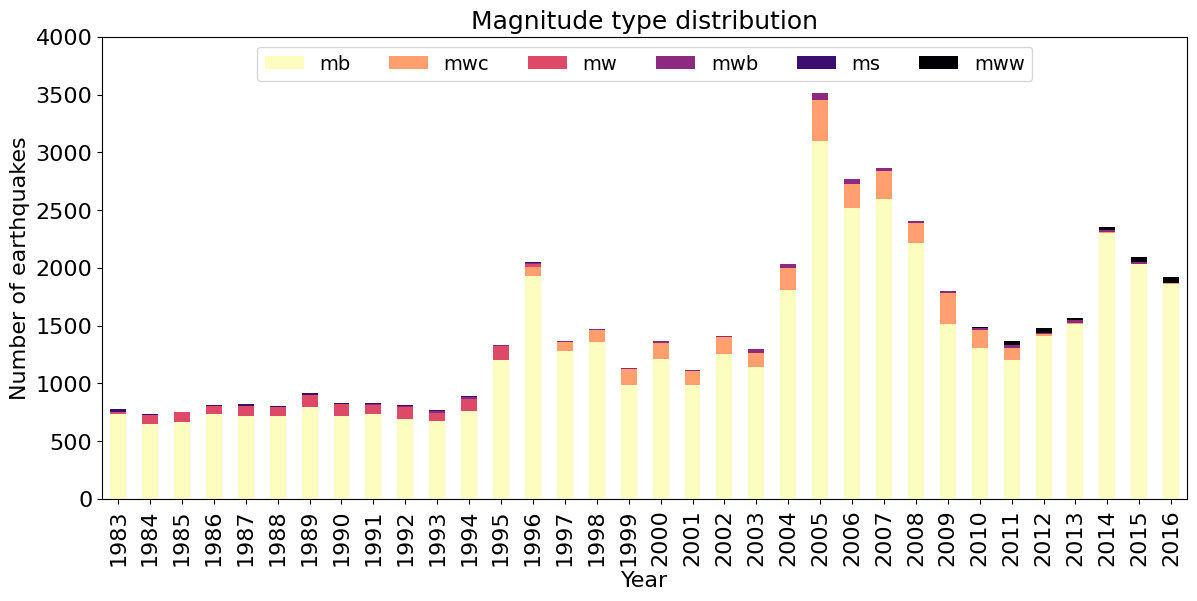

In [10]:
# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

df['dt_time'] = df['time'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add an additional column for the year
df['year'] = df['dt_time'].apply(lambda x: x.year)

# Groupby year
df_cut = df[['year', 'magType']]
df_magType = df_cut.groupby('year')['magType'].value_counts().unstack()

# Keep only the top 6 magnitude types for plotting
df_magType = df_magType[mag_keep]

# Plot the dataFrame as a stacked bar chart
ax = df_magType.plot(kind='bar', stacked=True,
                     colormap='magma_r', figsize=(14,6))
ax.set_ylim([0, 4000])
ax.legend(loc='upper center', ncol=6)
plt.xlabel('Year'), plt.ylabel('Number of earthquakes')
plt.title('Magnitude type distribution')
plt.show()

In [7]:
# Cut out years 1970 - 1982
df = df[df.year > 1982]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

# Total number of earthquakes
N_tot = df['mag'].count()
print('Total Jumlah EQ:', N_tot)

Earliest year of data: 1983
Total Jumlah EQ: 49987


**Gutenberg–Richter law**

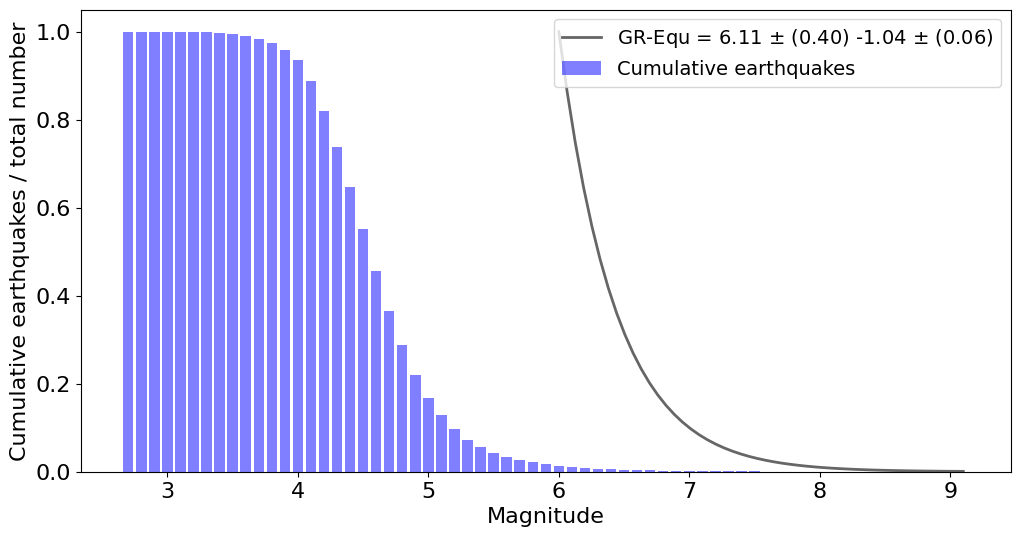

In [11]:
# Number of earthquakes by magnitude
mag_tot = df['mag'].value_counts()
mag_tot.sort_index(axis=0, inplace=True)

# Convert the indices of the Series to an np.ndarray
mags = np.asarray(mag_tot.index)

# between 6.0 and 9.1 (step=0.1)
mags_all = np.linspace(6.0,9.1,num=32)


magnitudes = np.arange(6,9,0.5)
counts = np.zeros(magnitudes.shape[0])

# compute the number of events with magnitude M >= m
i = 0
for m in magnitudes:
    counts[i] = df[df['mag'] >= m]['mag'].count()
    i += 1

# normalize
norm = np.sum(counts)
counts_n = counts/norm

# filter by removing empty data
counts_n_f = counts_n[counts_n!=0]
magnitudes_f = magnitudes[counts_n!=0]

# Add values for missing magnitudes
#mag_add = pd.Series(data=np.zeros(len(mags_miss)), index = mags_miss)
#mag_tot = pd.concat([mag_tot, mag_add])
mag_tot = pd.concat([mag_tot])
mag_tot.sort_index(axis=0, inplace=True)

mag_Ntot = np.cumsum(mag_tot.values[::-1])[::-1]

# Plot Gutenberg-Richter relationship: N = 10**(a-bM)
a = np.log10(1)+6
M = np.linspace(6, 9.1)
N = np.power(10, (a-M))

# compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))


label = r'GR-Equ = {:.2f} $\pm$ ({:.2f})'.format(reg.intercept, reg.intercept_stderr) + r' {:.2f} $\pm$ ({:.2f})'.format(reg.slope, reg.stderr)

plt.figure(figsize=(12,6))
ax1 = plt.bar(mag_tot.index, mag_Ntot/N_tot,
              width=0.08, color='blue', alpha=0.5,
              label='Cumulative earthquakes')
ax2 = plt.plot(M, N, 'k', linewidth = 2, alpha=0.6,
         label=label)

plt.ylabel('Cumulative earthquakes / total number')
plt.xlabel('Magnitude')
plt.legend()
plt.show()